In [1]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import tensorflow as tf

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [282]:
driver_ids = pd.read_csv("driver_ids.csv")
ride_ids = pd.read_csv("ride_ids.csv")
ride_timestamps = pd.read_csv("ride_timestamps.csv")

In [3]:
ride_ids.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [4]:
driver_ids.head()

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00


In [5]:
ride_timestamps.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


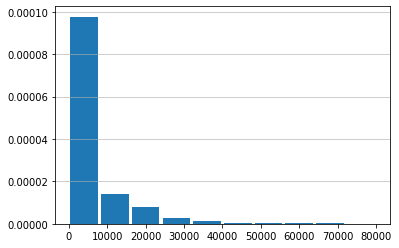

In [6]:
distance = ride_ids['ride_distance']
x,bins,p = plt.hist(ride_ids['ride_distance'], bins=10, range = [0,80000], rwidth = 0.9, density = True)
plt.grid(axis='y', alpha=0.75)

plt.show()

In [7]:
merged_rides = pd.merge(ride_ids, ride_timestamps, on='ride_id')
merged_rides

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,accepted_at,2016-04-23 02:14:15
2,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,arrived_at,2016-04-23 02:16:36
3,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,picked_up_at,2016-04-23 02:16:40
4,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,dropped_off_at,2016-04-23 02:22:07
5,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:00:49
6,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,accepted_at,2016-03-29 19:00:52
7,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,arrived_at,2016-03-29 19:03:57
8,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,picked_up_at,2016-03-29 19:04:01
9,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,dropped_off_at,2016-03-29 19:17:30


In [8]:
print(shape(driver_ids))
merged_rides['driver_id'][0]

(937, 2)


'002be0ffdc997bd5c50703158b7c2491'

In [9]:
def calculateFare(rides):
    base_fare = 2
    cpmile = 1.15
    cpminute = 0.22
    service_fee = 1.75
    min_fare = 5
    max_fare = 400
    
    fare = []
    for rows in rides.iterrows():
        value = base_fare + (rows[1]['ride_distance']/1609.34) * cpmile + (rows[1]['ride_duration']/60)*cpminute
        value = value + (value * rows[1]['ride_prime_time']/100) + service_fee 
        if value < min_fare:
            value = min_fare
        if value > max_fare:
            value = max_fare
        fare.append(value)
        
    rides['fare'] = fare
    

In [10]:
calculateFare(ride_ids)

In [11]:
ride_ids

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,fare
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,8.489653
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.118747
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.192580
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,77.861464
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,17.666316
5,002be0ffdc997bd5c50703158b7c2491,03d6b9d80b8a96135cb9b25178e9e203,4832,917,100,19.380355
6,002be0ffdc997bd5c50703158b7c2491,04053c0ed21761e07f0b869cab5b7dd0,1575,347,0,6.147795
7,002be0ffdc997bd5c50703158b7c2491,0534d432e0186625f623aaee57af98be,3056,687,25,10.128440
8,002be0ffdc997bd5c50703158b7c2491,053a1621c0affcd2b9c517af5c2bc843,3940,1143,75,17.511270
9,002be0ffdc997bd5c50703158b7c2491,066e92c52f59486de56cd7b8716a4ca6,3957,868,50,13.765382


In [12]:
def calculateDriverValue(driverID):
    all_driver_fare = []
    for row in driverID.iterrows():
        driver_all_rides = ride_ids[ride_ids['driver_id'] == row[1]['driver_id']]
        driver_all_fares = 0
        for row2 in driver_all_rides.iterrows():
            driver_all_fares = driver_all_fares + row2[1]['fare']
        all_driver_fare.append(driver_all_fares)
    driverID['total_fare'] = all_driver_fare
    return driverID

In [13]:
driver_with_value = calculateDriverValue(driver_ids)

In [14]:
driver_with_value

,driver_id,driver_onboard_date,total_fare
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,3560.926071
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,321.494948
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,482.428390
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,2610.871561
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,5381.097539
5,01788cf817698fe68eaecd7eb18b2f72,2016-05-06 00:00:00,0.000000
6,0213f8b59219e32142711992ca4ec01f,2016-04-07 00:00:00,2941.160242
7,021e5cd15ef0bb3ec20a12af99e142b3,2016-05-07 00:00:00,686.242111
8,0258e250ca195cc6258cbdc75aecd853,2016-04-26 00:00:00,4279.871375
9,028b5a4dcd7f4924ebfabcf2e814c014,2016-05-06 00:00:00,5197.530993


In [15]:
merged_rides['timestamp'] = [str(x) for x in merged_rides['timestamp']]

In [16]:
import datetime
from datetime import datetime

In [17]:
x = merged_rides['timestamp'].apply(str)

In [18]:
merged_rides_ex = merged_rides.loc[0:100]

In [19]:
merged_rides_ex

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,accepted_at,2016-04-23 02:14:15
2,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,arrived_at,2016-04-23 02:16:36
3,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,picked_up_at,2016-04-23 02:16:40
4,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,dropped_off_at,2016-04-23 02:22:07
5,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:00:49
6,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,accepted_at,2016-03-29 19:00:52
7,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,arrived_at,2016-03-29 19:03:57
8,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,picked_up_at,2016-03-29 19:04:01
9,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,dropped_off_at,2016-03-29 19:17:30


In [34]:
def add_date_column(merged_rides):
    date = []
    for row in merged_rides.iterrows():
        row_date = row[1]['timestamp'].split()[0]
        date.append(row_date)
    return date

In [71]:
def add_time_column(merged_rides):
    time = []
    for row in merged_rides.iterrows():
        if len(row[1]['timestamp'].split()) > 1 :
            row_time = row[1]['timestamp'].split()[1]
            time.append(row_time)
        else:
            time.append(0)
    return time

In [42]:
a = merged_rides.loc[0]

In [43]:
a['timestamp'].split()[1]

'02:13:50'

In [37]:
date = add_date_column(merged_rides)

In [38]:
merged_rides['date'] = date

In [72]:
time = add_time_column(merged_rides)

In [73]:
merged_rides['time'] = time

In [52]:
def add_y_m_d_columns(merged_rides):
    merged_rides[['year','month','day']] = merged_rides['date'].astype(str).str.split('-', expand=True).astype(float)

In [75]:
def add_hr_min_sec_columns(merged_rides):
    merged_rides[['hr','min','sec']] = merged_rides['time'].astype(str).str.split(':', expand=True).astype(float)

In [54]:
add_y_m_d_columns(merged_rides)

In [76]:
add_hr_min_sec_columns(merged_rides)

In [77]:
merged_rides

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,date,year,month,day,time,hr,min,sec
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:13:50,2016-04-23,2016.0,4.0,23.0,02:13:50,2.0,13.0,50.0
1,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,accepted_at,2016-04-23 02:14:15,2016-04-23,2016.0,4.0,23.0,02:14:15,2.0,14.0,15.0
2,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,arrived_at,2016-04-23 02:16:36,2016-04-23,2016.0,4.0,23.0,02:16:36,2.0,16.0,36.0
3,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,picked_up_at,2016-04-23 02:16:40,2016-04-23,2016.0,4.0,23.0,02:16:40,2.0,16.0,40.0
4,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,dropped_off_at,2016-04-23 02:22:07,2016-04-23,2016.0,4.0,23.0,02:22:07,2.0,22.0,7.0
5,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:00:49,2016-03-29,2016.0,3.0,29.0,19:00:49,19.0,0.0,49.0
6,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,accepted_at,2016-03-29 19:00:52,2016-03-29,2016.0,3.0,29.0,19:00:52,19.0,0.0,52.0
7,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,arrived_at,2016-03-29 19:03:57,2016-03-29,2016.0,3.0,29.0,19:03:57,19.0,3.0,57.0
8,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,picked_up_at,2016-03-29 19:04:01,2016-03-29,2016.0,3.0,29.0,19:04:01,19.0,4.0,1.0
9,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,dropped_off_at,2016-03-29 19:17:30,2016-03-29,2016.0,3.0,29.0,19:17:30,19.0,17.0,30.0


In [284]:
def driver_ids_add_date_column(driver_ids):
    date = []
    for row in driver_ids.iterrows():
        row_date = row[1]['driver_onboard_date'].split()[0]
        date.append(row_date)
    driver_ids['date'] = date
    

driver_ids_add_date_column(driver_ids)


In [291]:
def add_y_m_d_columns(merged_rides):
    merged_rides[['year','month','day']] = merged_rides['date'].astype(str).str.split('-', expand=True).astype(float)
add_y_m_d_columns(driver_ids)
driver_ids

,0,date,day,driver_id,driver_onboard_date,month,year
0,NaN,2016-03-29,29.0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,3.0,2016.0
1,NaN,2016-03-29,29.0,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,3.0,2016.0
2,NaN,2016-04-05,5.0,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,4.0,2016.0
3,NaN,2016-04-23,23.0,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,4.0,2016.0
4,NaN,2016-04-29,29.0,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,4.0,2016.0
5,NaN,2016-05-06,6.0,01788cf817698fe68eaecd7eb18b2f72,2016-05-06 00:00:00,5.0,2016.0
6,NaN,2016-04-07,7.0,0213f8b59219e32142711992ca4ec01f,2016-04-07 00:00:00,4.0,2016.0
7,NaN,2016-05-07,7.0,021e5cd15ef0bb3ec20a12af99e142b3,2016-05-07 00:00:00,5.0,2016.0
8,NaN,2016-04-26,26.0,0258e250ca195cc6258cbdc75aecd853,2016-04-26 00:00:00,4.0,2016.0
9,NaN,2016-05-06,6.0,028b5a4dcd7f4924ebfabcf2e814c014,2016-05-06 00:00:00,5.0,2016.0


In [301]:
ride_ids_sorted = merged_rides.sort_values(by='date', ascending=False)
driver_last_dates = ride_ids_sorted.drop_duplicates('driver_id', keep='first')
driver_last_dates.reset_index(drop = True)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,date,year,month,day,time,hr,min,sec
0,7c1478b12207107ae4296e656a49d6f6,72f0fa0bd86800e9da5c4dced32c8735,4430,850,75,arrived_at,nan,nan,NaN,NaN,NaN,0,0.0,NaN,NaN
1,5943b68c2fa8bcfd0add30691fd9136b,bf49073d4b4369bb0e08a2d36e1cd097,23035,1163,0,dropped_off_at,2016-06-27 00:20:32,2016-06-27,2016.0,6.0,27.0,00:20:32,0.0,20.0,32.0
2,689bdf87fb2de49f98bf4946cfaa5068,cd44d244f302709c84f21c56de437504,2947,453,0,dropped_off_at,2016-06-27 00:07:54,2016-06-27,2016.0,6.0,27.0,00:07:54,0.0,7.0,54.0
3,ffff51a71f2f185ec5e97d59dbcd7a78,f90966687aebca6cc9efcd9e42897b75,20668,1469,0,arrived_at,2016-06-27 00:02:03,2016-06-27,2016.0,6.0,27.0,00:02:03,0.0,2.0,3.0
4,ec78920915122cbe500fcb475a8fb5d3,8a18c5c67f4a7bb8f1ee3f482eb61727,11262,713,0,dropped_off_at,2016-06-27 00:06:20,2016-06-27,2016.0,6.0,27.0,00:06:20,0.0,6.0,20.0
5,55bec90600d21bd3513366d218f2b2f2,dbbe52211b1ed034fcb384a045229ff5,36818,2146,0,dropped_off_at,2016-06-27 00:31:23,2016-06-27,2016.0,6.0,27.0,00:31:23,0.0,31.0,23.0
6,0656192a402808805282e60761bda088,e51093e307953ecf29061fb83aee3081,3214,419,0,dropped_off_at,2016-06-27 00:05:27,2016-06-27,2016.0,6.0,27.0,00:05:27,0.0,5.0,27.0
7,8dbfef11a650dd9658ca0c6f70b84f88,311542541524c0d356fa8d7fc229baae,2546,388,25,dropped_off_at,2016-06-27 00:05:30,2016-06-27,2016.0,6.0,27.0,00:05:30,0.0,5.0,30.0
8,a4463e077e248abcd96b8ee584e7fec5,3259c38ec805a2b74611f5e9d53f140f,13181,4346,50,dropped_off_at,2016-06-27 00:50:50,2016-06-27,2016.0,6.0,27.0,00:50:50,0.0,50.0,50.0
9,e76529a86a5efc221a88a6c91a75ea59,ba31b0623e6f7c35033c107553376a35,8065,764,0,dropped_off_at,2016-06-27 00:04:29,2016-06-27,2016.0,6.0,27.0,00:04:29,0.0,4.0,29.0


In [302]:
def driver_time_with_lyft(driver_ids):

    last_dates = []
    last_year = []
    last_month = []
    last_day = []
    
    for row in driver_ids.iterrows():
        if len(driver_last_dates.loc[driver_last_dates['driver_id'] == row[1]['driver_id'],'month'])>0:
            last_month1 = driver_last_dates.loc[driver_last_dates['driver_id'] == row[1]['driver_id'],'month'].iloc[0]
            last_month.append(last_month1)
        if len(driver_last_dates.loc[driver_last_dates['driver_id'] == row[1]['driver_id'],'day'])>0:
            last_day1 = driver_last_dates.loc[driver_last_dates['driver_id'] == row[1]['driver_id'],'day'].iloc[0]
            last_day.append(last_day1)
        else:
            last_month1 = []
            last_month.append(last_month1)
            last_day1 = []
            last_day.append(last_day1)
            
        
        
    
    #last_dates_df = pd.DataFrame(last_year, last_month, last_day)
    last_month = pd.DataFrame(last_month)
    print(last_month)
    #driver_ids['last_year'] = last_year
    #driver_ids['last_month'] = last_month
    #driver_ids['last_day'] = last_day
    driver_ids = driver_ids.append(last_month)
    return driver_ids

In [303]:
    #driver_ids = pd.merge(driver_id, last_dates, how='left', on='driver_id')
        

In [304]:
driver_ids = driver_time_with_lyft(driver_ids)

       0
0      6
1      6
2      6
3      6
4      6
5     []
6      5
7      6
8      6
9      6
10     6
11     5
12     6
13     6
14     6
15     6
16     6
17     4
18     5
19     6
20     6
21     6
22     6
23     6
24     6
25     5
26     6
27     6
28     6
29     6
...   ..
7466  []
7467  []
7468  []
7469  []
7470  []
7471  []
7472  []
7473  []
7474  []
7475  []
7476  []
7477  []
7478  []
7479  []
7480  []
7481  []
7482  []
7483  []
7484  []
7485  []
7486  []
7487  []
7488  []
7489  []
7490  []
7491  []
7492  []
7493  []
7494  []
7495  []

[7496 rows x 1 columns]


In [308]:
driver_ids.describe

<bound method NDFrame.describe of         0        date   day                         driver_id  \
0     NaN  2016-03-29  29.0  002be0ffdc997bd5c50703158b7c2491   
1     NaN  2016-03-29  29.0  007f0389f9c7b03ef97098422f902e62   
2     NaN  2016-04-05   5.0  011e5c5dfc5c2c92501b8b24d47509bc   
3     NaN  2016-04-23  23.0  0152a2f305e71d26cc964f8d4411add9   
4     NaN  2016-04-29  29.0  01674381af7edd264113d4e6ed55ecda   
5     NaN  2016-05-06   6.0  01788cf817698fe68eaecd7eb18b2f72   
6     NaN  2016-04-07   7.0  0213f8b59219e32142711992ca4ec01f   
7     NaN  2016-05-07   7.0  021e5cd15ef0bb3ec20a12af99e142b3   
8     NaN  2016-04-26  26.0  0258e250ca195cc6258cbdc75aecd853   
9     NaN  2016-05-06   6.0  028b5a4dcd7f4924ebfabcf2e814c014   
10    NaN  2016-05-03   3.0  02d6a6b8a6da15fc219a9570f7ebbe78   
11    NaN  2016-03-31  31.0  02e440f6c209206375833cef02e0cbae   
12    NaN  2016-04-09   9.0  036f3d94e7c65e4e3574822d31c72656   
13    NaN  2016-04-12  12.0  039c5afbca8e03e4c18d9c8ea94